In [1]:
import pandas as pd
import json
from warnings import filterwarnings as _fw_
import matplotlib.pyplot as plt
from random import randint
from sklearn.cluster import KMeans

_fw_('ignore')

In [2]:
df = pd.read_csv('df.csv', encoding='utf-8').drop(columns='Unnamed: 0')
# df

In [3]:
with open('binary_columns.json', 'r', encoding='utf-8') as file:
    binary_columns = json.load(file)
# binary_columns[:-2]

In [4]:
target = binary_columns[0:13]
school_head5 = binary_columns[14:30]
school_tail5 = binary_columns[31:46]
course = binary_columns[47:56]
profession = binary_columns[57:66]

# КЛАСТЕРНЫЙ АНАЛИЗ МЕТОДОМ K-MEANS

In [5]:
df_K = df[binary_columns[:-2]]

In [6]:
model = KMeans(n_clusters=4, random_state=42, n_init=50, verbose=1, tol=1e-05)
model.fit(df_K)

Initialization complete
Iteration 0, inertia 164710.0.
Iteration 1, inertia 95064.56614403136.
Iteration 2, inertia 94107.1073105509.
Iteration 3, inertia 93631.7457222458.
Iteration 4, inertia 93413.6145881998.
Iteration 5, inertia 93326.06539936597.
Iteration 6, inertia 93283.17255088178.
Iteration 7, inertia 93263.33259690466.
Iteration 8, inertia 93248.69364522184.
Iteration 9, inertia 93231.73650060366.
Iteration 10, inertia 93210.02550160978.
Iteration 11, inertia 93183.82209363653.
Iteration 12, inertia 93149.4577436703.
Iteration 13, inertia 93113.88666881427.
Iteration 14, inertia 93087.53809127166.
Iteration 15, inertia 93069.54189755868.
Iteration 16, inertia 93057.13225083413.
Iteration 17, inertia 93050.58795333585.
Iteration 18, inertia 93046.32367334052.
Iteration 19, inertia 93043.61865058029.
Iteration 20, inertia 93041.95301961084.
Iteration 21, inertia 93040.59602559276.
Iteration 22, inertia 93039.35599514203.
Iteration 23, inertia 93038.48053649245.
Iteration 24, i

KMeans(n_clusters=4, n_init=50, random_state=42, tol=1e-05, verbose=1)

In [7]:
model.labels_

array([3, 2, 2, ..., 0, 0, 0])

In [8]:
model.cluster_centers_

array([[2.77777778e-01, 6.58333333e-01, 8.88095238e-01, 2.96428571e-01,
        1.87698413e-01, 7.89682540e-02, 5.69444444e-01, 8.00000000e-01,
        7.73809524e-02, 1.06746032e-01, 3.43253968e-01, 1.03174603e-01,
        1.41269841e-01, 1.94444444e-02, 1.11111111e-01, 1.49206349e-01,
        1.32936508e-01, 5.32936508e-01, 6.59523810e-01, 7.14285714e-01,
        1.80555556e-01, 2.76984127e-01, 6.82539683e-02, 2.28571429e-01,
        3.71428571e-01, 2.69841270e-01, 3.31746032e-01, 1.03174603e-01,
        8.88888889e-02, 3.33730159e-01, 1.07142857e-02, 3.15873016e-01,
        1.69444444e-01, 2.75000000e-01, 1.26587302e-01, 9.76190476e-02,
        5.75396825e-02, 1.40079365e-01, 1.59920635e-01, 3.37301587e-01,
        1.69841270e-01, 2.03968254e-01, 1.27777778e-01, 1.48412698e-01,
        3.81349206e-01, 3.47222222e-01, 1.15079365e-01, 4.87698413e-01,
        3.61904762e-01, 1.71428571e-01, 8.09523810e-02, 7.10317460e-02,
        5.43650794e-02, 2.15873016e-01, 2.88095238e-01, 3.888888

In [9]:
# пробуем обучать ml-модельку
new_respondents = [[randint(0, 1) for _ in range(67)] for __ in range(10)]
model.predict(new_respondents)

array([2, 0, 3, 3, 0, 2, 3, 2, 2, 3])

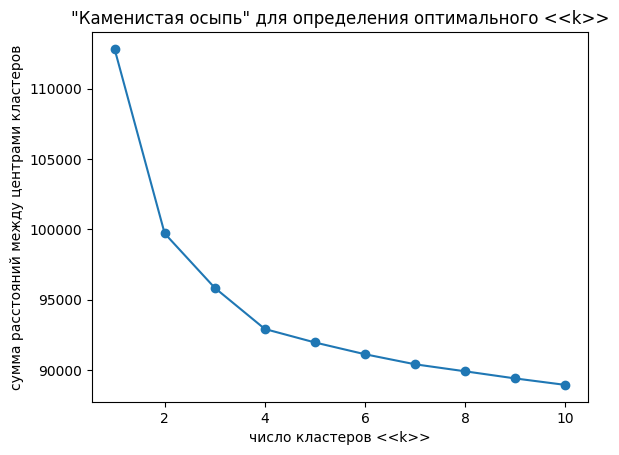

In [17]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42, n_init=50, verbose=0, tol=1e-05).fit(df_K) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('число кластеров <<k>>')
plt.ylabel('сумма расстояний между центрами кластеров')
plt.title('"Каменистая осыпь" для определения оптимального <<k>>')
plt.show()

In [11]:
model = KMeans(n_clusters=4, random_state=42, n_init=50, verbose=1, tol=1e-05)
model.fit(df_K)
df_K['cluster'] = model.labels_
df_K.groupby('cluster').mean()

Initialization complete
Iteration 0, inertia 164710.0.
Iteration 1, inertia 95064.56614403136.
Iteration 2, inertia 94107.1073105509.
Iteration 3, inertia 93631.7457222458.
Iteration 4, inertia 93413.6145881998.
Iteration 5, inertia 93326.06539936597.
Iteration 6, inertia 93283.17255088178.
Iteration 7, inertia 93263.33259690466.
Iteration 8, inertia 93248.69364522184.
Iteration 9, inertia 93231.73650060366.
Iteration 10, inertia 93210.02550160978.
Iteration 11, inertia 93183.82209363653.
Iteration 12, inertia 93149.4577436703.
Iteration 13, inertia 93113.88666881427.
Iteration 14, inertia 93087.53809127166.
Iteration 15, inertia 93069.54189755868.
Iteration 16, inertia 93057.13225083413.
Iteration 17, inertia 93050.58795333585.
Iteration 18, inertia 93046.32367334052.
Iteration 19, inertia 93043.61865058029.
Iteration 20, inertia 93041.95301961084.
Iteration 21, inertia 93040.59602559276.
Iteration 22, inertia 93039.35599514203.
Iteration 23, inertia 93038.48053649245.
Iteration 24, i

,TARGET Сменить работу в своей сфере деятельности,TARGET Сменить работу и сферу деятельности,TARGET Увеличить уровень зарплаты,TARGET Найти подработку,"TARGET Устроиться на первую работу, стартовать карьеру",TARGET Углубить имеющиеся навыки для текущей работы,TARGET Для саморазвития,TARGET Перейти на удаленную работу,TARGET Подтянуть навыки для текущей работы,TARGET Освоить навыки для применения в своем бизнесе,...,PROFESSION Востребованность профессии,PROFESSION Более высокая зарплата в этой профессии,PROFESSION Более интересный род занятий в работе,PROFESSION Перспективы карьерного роста,PROFESSION Наличие определенных знаний до обучения,PROFESSION Возможность применять знания в текущей работе,PROFESSION Возможность работать удаленно,PROFESSION Возможность работать в IT-сфере,PROFESSION Простота трудоустройства,PROFESSION Другое
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.277778,0.658333,0.888095,0.296429,0.187698,0.078968,0.569444,0.800000,0.077381,0.106746,...,0.677778,0.671032,0.263889,0.454762,0.070238,0.141270,0.761111,0.423810,0.192460,0.005556
1,0.112516,0.611219,0.050908,0.108625,0.169909,0.014916,0.114786,0.353761,0.012970,0.021077,...,0.732166,0.450389,0.250324,0.399481,0.060636,0.085927,0.736381,0.483463,0.169261,0.004864
2,0.215877,0.545961,0.401114,0.232591,0.268802,0.077298,0.467270,0.502786,0.068245,0.114206,...,0.623955,0.548050,0.295961,0.462396,0.098886,0.203343,0.642758,0.700557,0.191504,0.008357
3,0.164031,0.175064,0.140125,0.134241,0.130195,0.107025,0.302317,0.175800,0.113277,0.111438,...,0.344612,0.260758,0.254873,0.271423,0.127253,0.290916,0.430673,0.332107,0.123575,0.031629


In [12]:
*clusters, = range(0, df_K.cluster.nunique())
categories = [target, school_head5, school_tail5, course, profession]
clusters_dictionary = {}
FX = lambda x: df_K.groupby('cluster').mean().loc[:, x].idxmax(axis=1)
for i_cluster in clusters:
    clusters_dictionary[i_cluster] = {'target': FX(categories[0])[i_cluster],
                                      'school_head5': FX(categories[1])[i_cluster],
                                      'school_tail5': FX(categories[2])[i_cluster],
                                      'course': FX(categories[3])[i_cluster],
                                      'profession': FX(categories[4])[i_cluster]}
clusters_dictionary

{0: {'target': 'TARGET Увеличить уровень зарплаты',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 1: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Инженер по тестированию',
  'profession': 'PROFESSION Возможность работать удаленно'},
 2: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
  'school_tail5': 'SCHOOL_TAIL5 Истории успеха выпускников',
  'course': 'COURSE Java-разработчик',
  'profession': 'PROFESSION Возможность работать в IT-сфере'},
 3: {'target': 'TARGET Для саморазвития',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобн

In [13]:
df_K.groupby('cluster').size()

cluster
0    2520
1    3084
2    1436
3    2719
dtype: int64